In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import datasets

In [2]:
#Classification metrics

In [3]:
os.chdir(r'C:\Users\Vish\Documents\Data\Dataset')
df=pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
x = df.iloc[:,:8].values 
y = df['Outcome'] 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)

In [6]:
#Model building
model = LogisticRegression()
model = model.fit(X_train, y_train)

C:\Users\Vish\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [10]:
#Predictions
y_pred = model.predict(X_test)
probs = model.predict_proba(X_test)
y_prob = probs[:, 1]

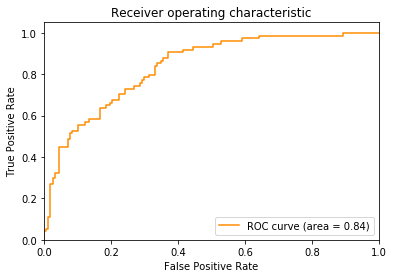

In [12]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# #Which Error is Costly??
# i = np.arange(len(tpr)) # index for df
# roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr,
# index = i),'1-fpr' : pd.Series(1-fpr, index = i)})
# print(roc)

In [ ]:
# #Which Error is Costly??
# #i = np.arange(len(tpr)) # index for df
# roc_with_threshold = pd.DataFrame({'fpr' : pd.Series(fpr, index=thresholds),'tpr' : pd.Series(tpr,
# index = thresholds),'1-fpr' : pd.Series(1-fpr, index = thresholds)})
# print(roc_with_threshold)

In [10]:
#Evaluating the model
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 score: ", metrics.f1_score(y_test, y_pred))
print("Classification report:")
print(metrics.classification_report(y_test,y_pred))

Accuracy:  0.7792207792207793
Precision:  0.7090909090909091
Recall:  0.527027027027027
F1 score:  0.6046511627906976
Classification report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



In [9]:
#Regression metrics

In [24]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [25]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
boston['MEDV'] = boston_dataset.target

In [28]:
x=boston.drop(['MEDV'],axis=1)
y=boston['MEDV']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=5)

In [31]:
#Model building
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
#Predictions
y_pred= lin_model.predict(x_test)

In [52]:
#Evaluating the model
print('Mean Absolute Error =',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error = ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error = ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 Score = ',metrics.r2_score(y_test,y_pred))

Mean Absolute Error = 3.2132704958423575
Mean Squared Error =  20.869292183770483
Root Mean Squared Error =  4.568292042303171
R2 Score =  0.7334492147453118
